In [16]:
import cv2
import os
import pandas as pd
import numpy as np
from numpy import asarray
from matplotlib import pyplot as plt

In [17]:
arr = os.listdir('C:\\Users\\jonat\\Project 2-2\\with face\\')
posImages = list()
dim = (128,64)
tt = 0
for theImage in arr:
    tt+=1
    if tt<2:
        face_img = cv2.imread('C:\\Users\\jonat\\Project 2-2\\with face\\' + theImage)
        bicubic = cv2.resize(np.float32(face_img), dsize=dim, interpolation=cv2.INTER_CUBIC)
        gray = cv2.cvtColor(bicubic, cv2.COLOR_BGR2GRAY)
        data = asarray(gray)
        data = data.astype(np.uint8)
        posImages.append(data)

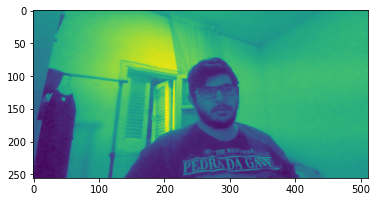

In [3]:
plt.imshow(posImages[3201])

In [21]:
hog_features = list()
winSize = dim
blockSize = (8,8)
blockStride = (4,4)
cellSize = (4,4)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64
hog = cv2.HOGDescriptor(winSize,blockSize,blockStride,cellSize,nbins,derivAperture,winSigma,histogramNormType,L2HysThreshold,gammaCorrection,nlevels)
for image in posImages:
    hog_features.append(hog.compute(image))
print(hog_features)
print(len(hog_features))

[array([[0.1450494 ],
       [0.07049675],
       [0.09557497],
       ...,
       [0.26382676],
       [0.08985801],
       [0.11515177]], dtype=float32)]
16740


In [5]:
labels1 = np.full((len(posImages), 1), 1)

In [6]:
arr2 = os.listdir('C:\\Users\\jonat\\Project 2-2\\without face\\')
negImages = list()
for theImage in arr2:
    face_img = cv2.imread('C:\\Users\\jonat\\Project 2-2\\without face\\' + theImage)
    bicubic = cv2.resize(np.float32(face_img), dsize=dim, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(bicubic, cv2.COLOR_BGR2GRAY)
    data = asarray(gray)
    data = data.astype(np.uint8)
    negImages.append(data)

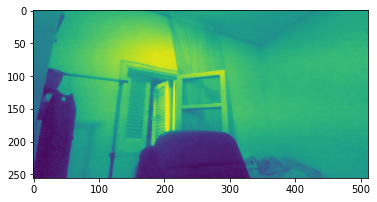

In [7]:
plt.imshow(negImages[3500])

In [8]:
for image in negImages:
    hog_features.append(hog.compute(image))

In [12]:
labels2 = np.full((len(negImages),1),0)
labels =  np.vstack((labels1,labels2))

In [10]:
both = []
for i in range(len(hog_features)):
    both.append([hog_features[i], labels[i][0]])

In [11]:
import random
random.shuffle(both)
index = round(len(both)*0.5)
train_data = both[:index]
test_data = both[index:]
X_train = []
Y_train = []
for i in range(len(train_data)):
    X_train.append(train_data[i][0])
    Y_train.append(train_data[i][1])
X_test = []
Y_test = []
for i in range(len(test_data)):
    X_test.append(test_data[i][0])
    Y_test.append(test_data[i][1])

In [13]:
svm = cv2.ml.SVM_create()
svm.setType(cv2.ml.SVM_C_SVC)
svm.setKernel(cv2.ml.SVM_RBF)

svm.trainAuto(np.array(X_train),cv2.ml.ROW_SAMPLE,np.array(Y_train))

KeyboardInterrupt: 

In [ ]:
testhog = list()
posImages1 = list()
negImages1 = list()
arr = os.listdir('C:\\Users\\jonat\\Project 2-2\\testface\\')
for theImage in arr:
    face_img = cv2.imread('C:\\Users\\jonat\\Project 2-2\\testface\\' + theImage)
    bicubic = cv2.resize(np.float32(face_img), dsize=dim, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(bicubic, cv2.COLOR_BGR2GRAY)
    data = asarray(gray)
    data = data.astype(np.uint8)
    posImages1.append(data)
for image in posImages1:
    testhog.append(hog.compute(image))
labels3 = np.full((len(posImages1),1),1)
arr1 = os.listdir('C:\\Users\\jonat\\Project 2-2\\testnoface\\')
for theImage in arr1:
    face_img = cv2.imread('C:\\Users\\jonat\\Project 2-2\\testnoface\\' + theImage)
    bicubic = cv2.resize(np.float32(face_img), dsize=dim, interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(bicubic, cv2.COLOR_BGR2GRAY)
    data = asarray(gray)
    data = data.astype(np.uint8)
    negImages1.append(data)
for image in negImages1:
    testhog.append(hog.compute(image))
labels4 = np.full((len(negImages1),1),0)
ultlabels =  np.vstack((labels3,labels4))

In [ ]:
y_val = svm.predict(np.array(testhog))
print(len(y_val[1]))
print(len(ultlabels))
pos = 0
for i in range(len(y_val[1])):
    print(y_val[1][i][0]," == ",ultlabels[i])
    if(y_val[1][i][0]==ultlabels[i]):
        pos+=1
print("acc: ", pos/len(y_val[1]))

In [ ]:
total = 0
pos = 0
print(len(Y_test))
for i in range(len(Y_test)):
    print(Y_test[i], " == ",y_val[1][i][0])
    total += 1
    if Y_test[i]==y_val[1][i][0]:
        pos+=1
print("Accuracy: "+str(pos/total))

In [ ]:
svm.save('model.xml')